## Final Project Submission

Please fill out:
* Student name: Valary Thairu
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Veronicah Isiaho
* Blog post URL: https://github.com/valarythairu/dsc-phase-2-project-v2-3.git


In [358]:
# Your code here - remember to use markdown cells for comments as well!

### Phase Two Project 

### 1. Business Understanding 
#### a) Introduction
Housing has been a long-term focus of urban development and social and economic policies. Housing Price prediction unfortunately been a very stressful task as they are factors to consider when setting the price for a home. 
A real estate agency in NorthWestern County has assigned you a project to analyze house prices in NorthWestern County based on the various factors of a home affecting house price. We will use multiple linear regression to establish how different factor affects pricing of houses. It will also help homeowners to know which homes to sell and their sale rate before and after home renovations.

#### b) Problem Statement
The real estate agency requires a detailed analysis that explains the factors that are affecting house prices in NorthWestern County.
The real estate agency also wants to know how to help homeowners to know which specific home renovation affect property value to be able to make an approrpiate decision.


#### Main Objective
To explore the Kings County House Sales dataset and find the factors affecting house prices and extract insights on the factors to be focused on to increase house prices.

#### c) Data Understanding
The data is from the Kings County House Sales dataset, it contains a range of values that provide details of the different factors of a house including its price. 
Analysis of this dataset what contributes to success of house pricing in reference to the different factors affecting it.

#### 2. Importing Libraries

In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import LabelEncoder

#### 3. Reading the Data

In [360]:
df = pd.read_csv("data/kc_house_data.csv")
df

id        date     price  bedrooms  bathrooms  sqft_living   
0      7129300520  10/13/2014  221900.0         3       1.00         1180  \
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...          grade sqft_above   
0          5650     1.0        NaN  NONE  ...      7 Average       1180  \
1          7242     2.0         NO  NONE  ...      7 Average       2170   
2         10000     1.0         NO  NONE  ...  6 Low Average        770   
3          5000     1.0         NO  NONE  ...      7 Average       1050   
4          8080     1.0         NO  NONE  ...         8 Good       1680   
...         ...     ...        ...   ...  ...            ...        ...   
21592      1131     3.0         NO  NONE  ...         8 Good       1530   
21593      5813     2.0         NO  NONE  ...         8 Good       2310   
21594      1350     2.0         NO  NONE  ...      7 Average       1020   
21595      2388     2.0        NaN  NONE  ...         8 Good       1600   
21596      1076     2.0         NO  NONE  ...      7 Average       1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long   
0                0.0     1955           0.0    98178  47.5112 -122.257  \
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

##### Checking the data

In [361]:
# displays the first five rows of the dataset
df.head() 

id        date     price  bedrooms  bathrooms  sqft_living   
0  7129300520  10/13/2014  221900.0         3       1.00         1180  \
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above   
0      5650     1.0        NaN  NONE  ...      7 Average       1180  \
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long   
0            0.0     1955           0.0    98178  47.5112 -122.257  \
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [362]:
# displays the last five rows of the dataset
df.tail() 

id        date     price  bedrooms  bathrooms  sqft_living   
21592   263000018   5/21/2014  360000.0         3       2.50         1530  \
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...      grade sqft_above   
21592      1131     3.0         NO  NONE  ...     8 Good       1530  \
21593      5813     2.0         NO  NONE  ...     8 Good       2310   
21594      1350     2.0         NO  NONE  ...  7 Average       1020   
21595      2388     2.0        NaN  NONE  ...     8 Good       1600   
21596      1076     2.0         NO  NONE  ...  7 Average       1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long   
21592            0.0     2009           0.0    98103  47.6993 -122.346  \
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[5 rows x 21 columns]

##### 4. Basic Data Understanding

In [363]:
df.shape # displays the number of rows and columns in the dataset respectively.

(21597, 21)

In [364]:
# displays the datatypes of column data in the dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

##### Based on data above there are 21 columns and 21597 rows. The dataset has categorical and numerical features.

In [365]:
# displays the column names of the dataset
df.columns 

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [366]:
# displays the columns with numerical variables
df.select_dtypes(include=['int64','float64']) 

id     price  bedrooms  bathrooms  sqft_living  sqft_lot   
0      7129300520  221900.0         3       1.00         1180      5650  \
1      6414100192  538000.0         3       2.25         2570      7242   
2      5631500400  180000.0         2       1.00          770     10000   
3      2487200875  604000.0         4       3.00         1960      5000   
4      1954400510  510000.0         3       2.00         1680      8080   
...           ...       ...       ...        ...          ...       ...   
21592   263000018  360000.0         3       2.50         1530      1131   
21593  6600060120  400000.0         4       2.50         2310      5813   
21594  1523300141  402101.0         2       0.75         1020      1350   
21595   291310100  400000.0         3       2.50         1600      2388   
21596  1523300157  325000.0         2       0.75         1020      1076   

       floors  sqft_above  yr_built  yr_renovated  zipcode      lat     long   
0         1.0        1180      1955           0.0    98178  47.5112 -122.257  \
1         2.0        2170      1951        1991.0    98125  47.7210 -122.319   
2         1.0         770      1933           NaN    98028  47.7379 -122.233   
3         1.0        1050      1965           0.0    98136  47.5208 -122.393   
4         1.0        1680      1987           0.0    98074  47.6168 -122.045   
...       ...         ...       ...           ...      ...      ...      ...   
21592     3.0        1530      2009           0.0    98103  47.6993 -122.346   
21593     2.0        2310      2014           0.0    98146  47.5107 -122.362   
21594     2.0        1020      2009           0.0    98144  47.5944 -122.299   
21595     2.0        1600      2004           0.0    98027  47.5345 -122.069   
21596     2.0        1020      2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 15 columns]

In [367]:
# displays columns with categorical variables
df.select_dtypes(include='object') 

date waterfront  view  condition          grade sqft_basement
0      10/13/2014        NaN  NONE    Average      7 Average           0.0
1       12/9/2014         NO  NONE    Average      7 Average         400.0
2       2/25/2015         NO  NONE    Average  6 Low Average           0.0
3       12/9/2014         NO  NONE  Very Good      7 Average         910.0
4       2/18/2015         NO  NONE    Average         8 Good           0.0
...           ...        ...   ...        ...            ...           ...
21592   5/21/2014         NO  NONE    Average         8 Good           0.0
21593   2/23/2015         NO  NONE    Average         8 Good           0.0
21594   6/23/2014         NO  NONE    Average      7 Average           0.0
21595   1/16/2015        NaN  NONE    Average         8 Good           0.0
21596  10/15/2014         NO  NONE    Average      7 Average           0.0

[21597 rows x 6 columns]

#### Converting column data types
##### There are some problems with the dataset that should be addressed for the purpose of making the data better. The problems are:
##### Sqft basement should be int, yr_renovated and yr_built should be object.

In [368]:
df.yr_built.value_counts()

yr_built
2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: count, Length: 116, dtype: int64

In [369]:
# removes rows with '?' data
df = df.loc[df['yr_renovated'] != "?"] 

In [370]:
df['yr_built'] = df['yr_built'].astype('object')
df['yr_renovated'] = df['yr_renovated'].astype('object')
## Convert these columns 'yr_built' and 'yr_renovated' to object

In [371]:
# Removes any rows with '?' data
df = df.loc[df['sqft_basement'] != "?"] 

In [372]:
df['sqft_basement'] = df['sqft_basement'].astype('float64').astype('int64') 
## Converts 'sqft_basement' column to float_64 and int_64

In [373]:
df.info() 
# Checking for conversion of the datatypes of the columns

<class 'pandas.core.frame.DataFrame'>
Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     18804 non-null  object 
 9   view           21082 non-null  object 
 10  condition      21143 non-null  object 
 11  grade          21143 non-null  object 
 12  sqft_above     21143 non-null  int64  
 13  sqft_basement  21143 non-null  int64  
 14  yr_built       21143 non-null  object 
 15  yr_renovated   17389 non-null  object 
 16  zipcode        21143 non-null  int64  
 17  lat            21143 non-null  float64
 18  long       

##### Revising Data Types

Chceking if the conversion of data types has happened.

In [374]:
df.select_dtypes(include=['int64','float64'])

id     price  bedrooms  bathrooms  sqft_living  sqft_lot   
0      7129300520  221900.0         3       1.00         1180      5650  \
1      6414100192  538000.0         3       2.25         2570      7242   
2      5631500400  180000.0         2       1.00          770     10000   
3      2487200875  604000.0         4       3.00         1960      5000   
4      1954400510  510000.0         3       2.00         1680      8080   
...           ...       ...       ...        ...          ...       ...   
21592   263000018  360000.0         3       2.50         1530      1131   
21593  6600060120  400000.0         4       2.50         2310      5813   
21594  1523300141  402101.0         2       0.75         1020      1350   
21595   291310100  400000.0         3       2.50         1600      2388   
21596  1523300157  325000.0         2       0.75         1020      1076   

       floors  sqft_above  sqft_basement  zipcode      lat     long   
0         1.0        1180              0    98178  47.5112 -122.257  \
1         2.0        2170            400    98125  47.7210 -122.319   
2         1.0         770              0    98028  47.7379 -122.233   
3         1.0        1050            910    98136  47.5208 -122.393   
4         1.0        1680              0    98074  47.6168 -122.045   
...       ...         ...            ...      ...      ...      ...   
21592     3.0        1530              0    98103  47.6993 -122.346   
21593     2.0        2310              0    98146  47.5107 -122.362   
21594     2.0        1020              0    98144  47.5944 -122.299   
21595     2.0        1600              0    98027  47.5345 -122.069   
21596     2.0        1020              0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21143 rows x 14 columns]

##### There are now 14 columns with numerical features.

In [375]:
df.select_dtypes(include="object")

date waterfront  view  condition          grade yr_built   
0      10/13/2014        NaN  NONE    Average      7 Average     1955  \
1       12/9/2014         NO  NONE    Average      7 Average     1951   
2       2/25/2015         NO  NONE    Average  6 Low Average     1933   
3       12/9/2014         NO  NONE  Very Good      7 Average     1965   
4       2/18/2015         NO  NONE    Average         8 Good     1987   
...           ...        ...   ...        ...            ...      ...   
21592   5/21/2014         NO  NONE    Average         8 Good     2009   
21593   2/23/2015         NO  NONE    Average         8 Good     2014   
21594   6/23/2014         NO  NONE    Average      7 Average     2009   
21595   1/16/2015        NaN  NONE    Average         8 Good     2004   
21596  10/15/2014         NO  NONE    Average      7 Average     2008   

      yr_renovated  
0              0.0  
1           1991.0  
2              NaN  
3              0.0  
4              0.0  
...            ...  
21592          0.0  
21593          0.0  
21594          0.0  
21595          0.0  
21596          0.0  

[21143 rows x 7 columns]

##### There are now 7 columns with categorical features.

#### 5. Data Preparation.
#### To prepare data we need to clean the dataset by:
  i) Checking for duplicates.

  ii) Identifying and dealing with null values.
  
  iii) Identifing outliers and removing them.

#### i) Checking for duplicates.
The code below checks for any duplicated values in the dataset.

In [376]:
df.duplicated().any() 

False

##### The data has no duplicate values.

#### ii) Identifying and dealing with null values.

The code below checks for missing values in the dataset.

In [377]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

'View', 'waterfront' and 'yr_renovated' have missing values.

In [378]:
def missing_values(df):
    # checks sum of missing values in the data
    missing = df.isnull().sum()
    # Create a percentage of missing values in data.
    percentage = (df.isnull().sum())/len(df)
    # Store in a dataframe
    miss = pd.DataFrame({"missing values":missing, "Percentage of missing values": percentage})
    # remove data with no missing values
    miss.drop(miss[miss['Percentage of missing values'] == 0].index , inplace=True)
    

    return miss 
Missing_Values = missing_values(df)
print (Missing_Values)

              missing values  Percentage of missing values
waterfront              2339                      0.110628
view                      61                      0.002885
yr_renovated            3754                      0.177553


There are three columns with missing data.

'yr_renovated' has the highest number of missing values followed by 'waterfront' and finally 'view' with the least missing values.

#### Dealing with the missing values

I dealt with the missing column values separately

In [379]:
df['waterfront'] = df['waterfront'].fillna(method='bfill')
df['waterfront'].value_counts()

waterfront
NO     20977
YES      166
Name: count, dtype: int64

We have filled the rows in 'waterfront' with missing values using backfill method.

In [380]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df['yr_renovated'].value_counts()

yr_renovated
0.0       20420
2014.0       69
2003.0       31
2013.0       31
2007.0       30
          ...  
1959.0        1
1951.0        1
1976.0        1
1953.0        1
1948.0        1
Name: count, Length: 69, dtype: int64

We have replaced the rows in 'yr_renovated' with missing values with the value '0' which indicates that these rows have no values.

In [381]:
df['view'] = df['view'].fillna(method='bfill')
df['view'].value_counts()

view
NONE         19076
AVERAGE        931
GOOD           497
FAIR           328
EXCELLENT      311
Name: count, dtype: int64

We have replaced the rows in 'view' with missing values using backfill method.

The code below confirms if there are still missing values in the dataset.

In [382]:
df.isnull().sum() 
# Dsplays missing values in the dataset

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are now no missing values in the dataset.

#### iii) Identifying Outliers and removing them

As outliers are a concept only applicable to numerical features we will only be checking for outliers in numerical features.

#### We can use boxplot to Identify Outliers

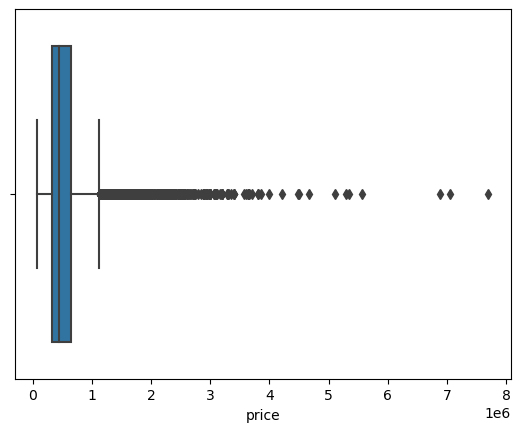

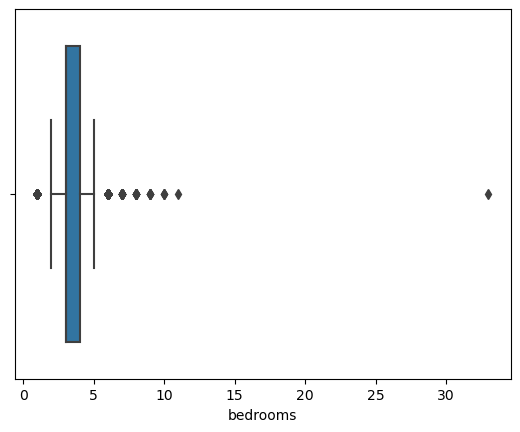

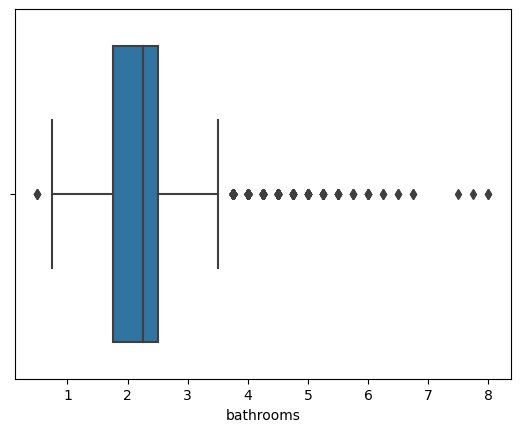

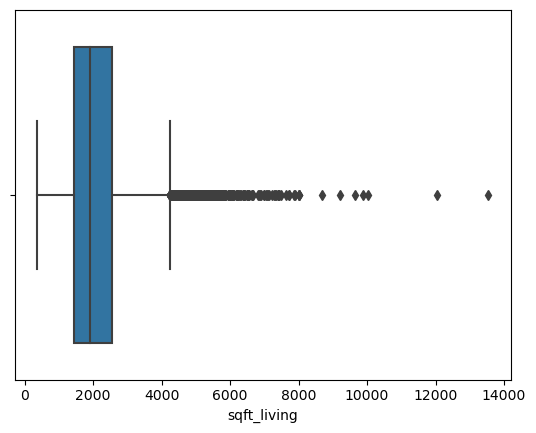

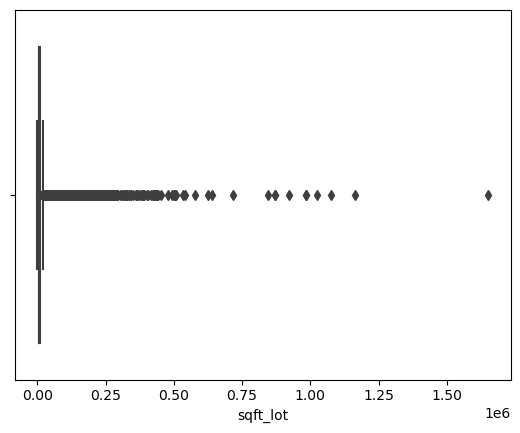

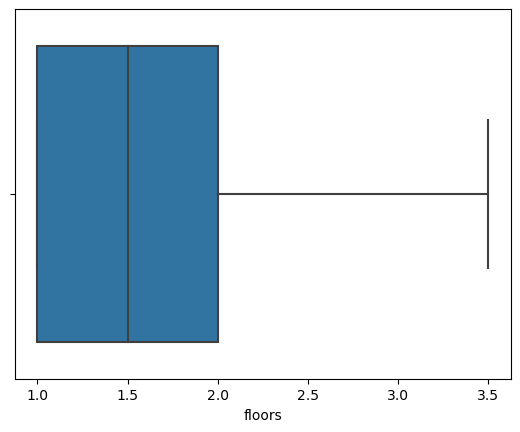

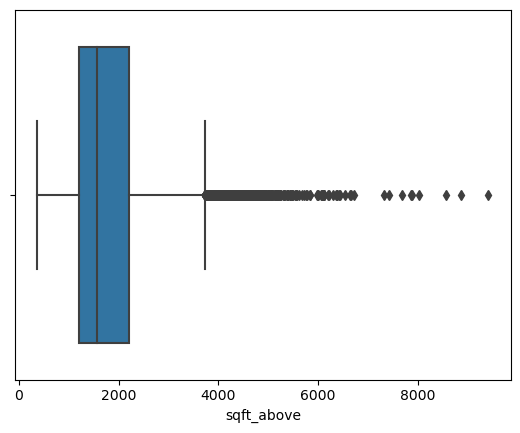

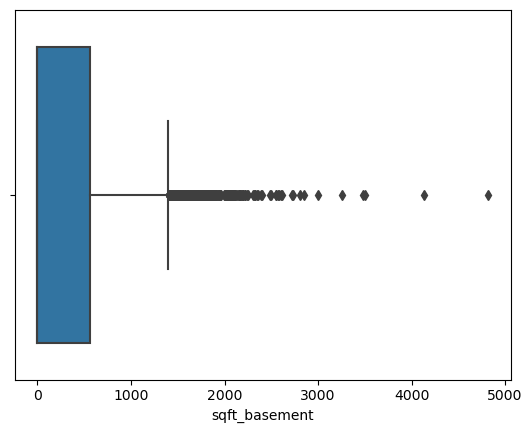

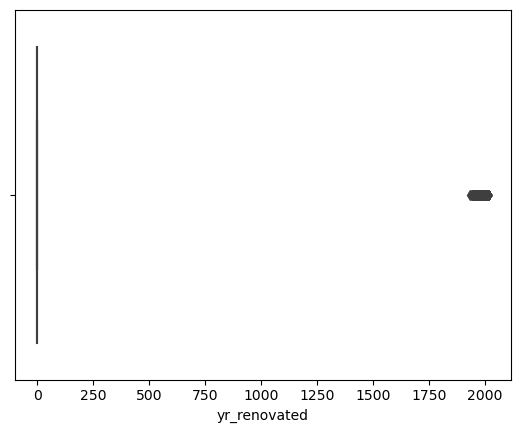

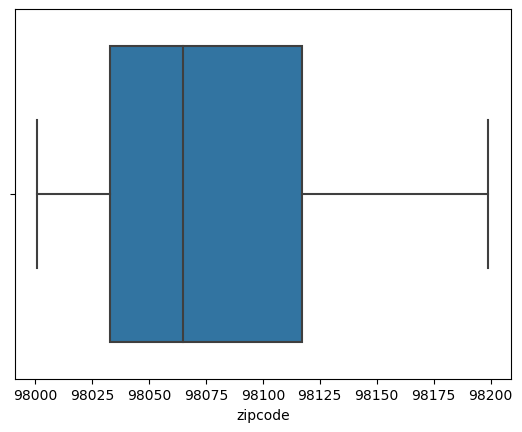

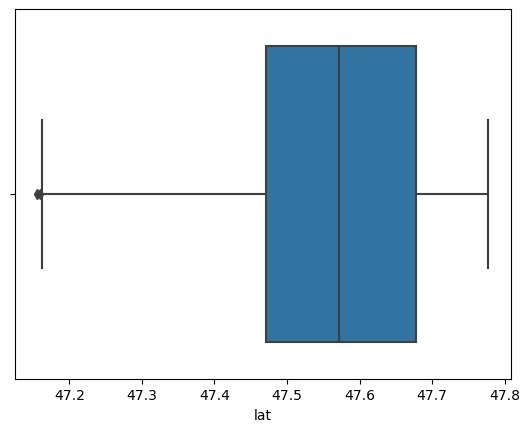

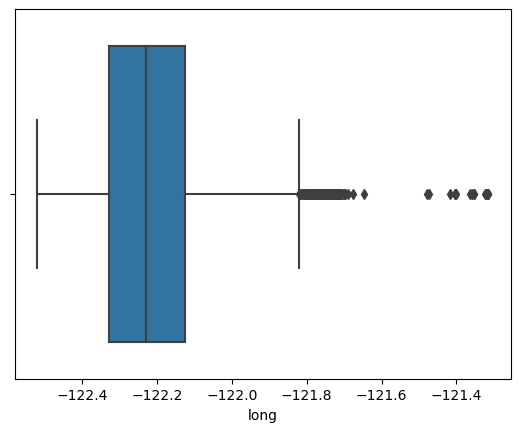

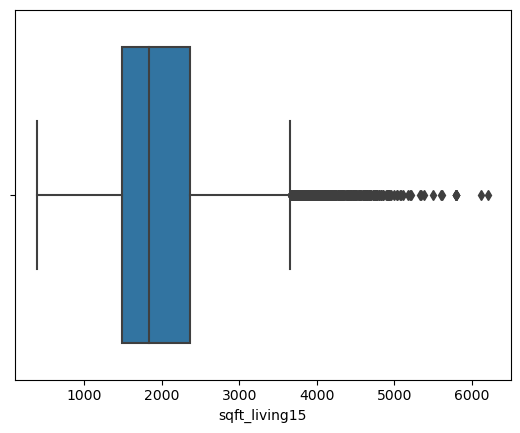

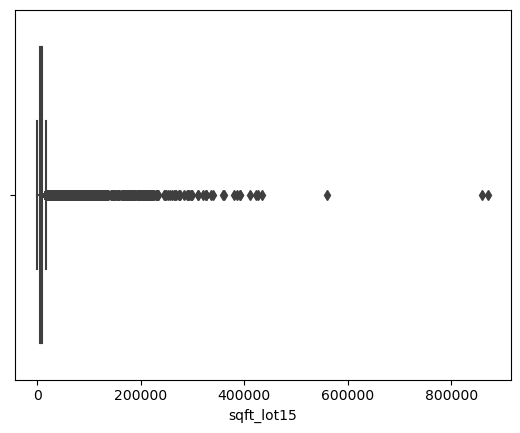

In [383]:
numerical_cols = df.select_dtypes('number').columns.tolist()
numerical_cols.remove('id')
for col in numerical_cols:
    sns.boxplot(x = df[col])
    plt.show()

Let us first correct some typing errors.

In [384]:
df['bathrooms'] = df["bathrooms"].round().astype(int) 
df.bathrooms.value_counts()

bathrooms
2    13568
1     3837
3     2470
4     1181
5       55
6       23
8        4
0        3
7        2
Name: count, dtype: int64

##### We have rounded off the floats and converted to integer using astype() which has made the column data count easily interpretable and removed error.

In [385]:
df['floors'] = df['floors'].round().astype(int)
df.floors.value_counts()

floors
1    10456
2    10087
3      593
4        7
Name: count, dtype: int64

##### We have done the same with floors and removed the typing error.

Now lets proceed to check for outliers and remove them.

In [386]:
def outliers(df):
    # Dictionary for placing no. of outliers and the column name.
    outliers_dict = {}
    standardized_dict = {}
    # For loop for checking outliers in every column in the dataframe.
    for column in df.columns:
        # Lower quantile
        Q1 = df[column].quantile(0.25)
        # Upper Quantile
        Q3 = df[column].quantile(0.75)
        # Finding IQR
        IQR = Q3 - Q1
        # Defining lower and upper bound
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        # Finding outliers
        outliers = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_dict[column] = 'The number of outliers is', len(outliers)
        # Data without outliers
        standardized_numvotes = df[column][(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        # Putting standardized values in a dict
        standardized_dict[column] = standardized_numvotes
    standardized_df = pd.DataFrame(standardized_dict)
    # Results
    return standardized_df

numeric_columns = df.select_dtypes("number")
numeric_data = outliers(numeric_columns)

We can now display the numerical variables after removing outliers using box plots.

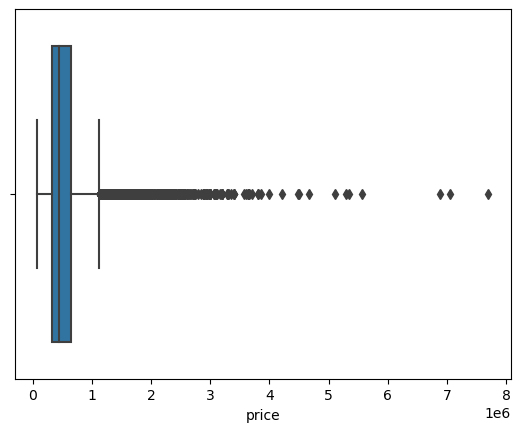

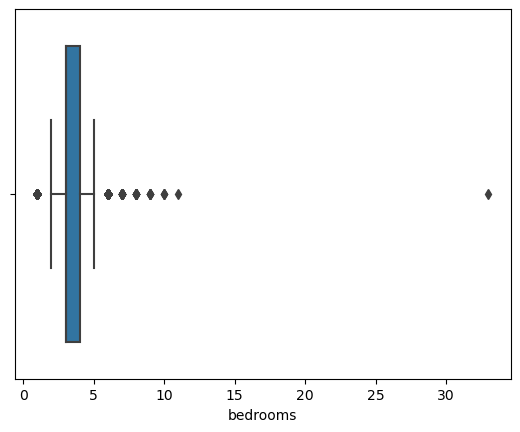

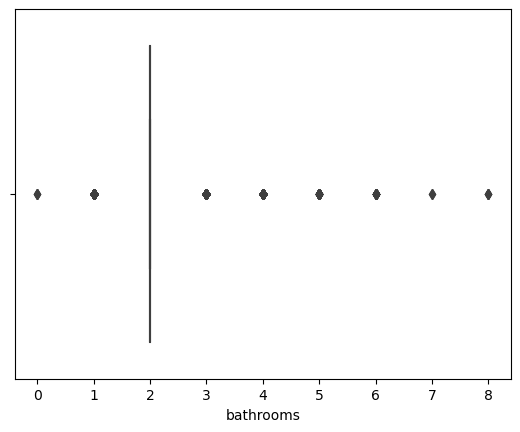

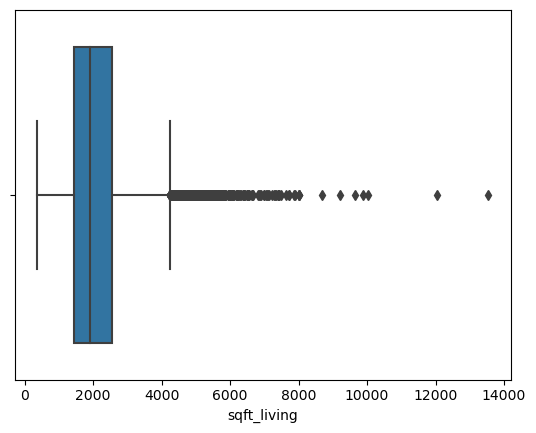

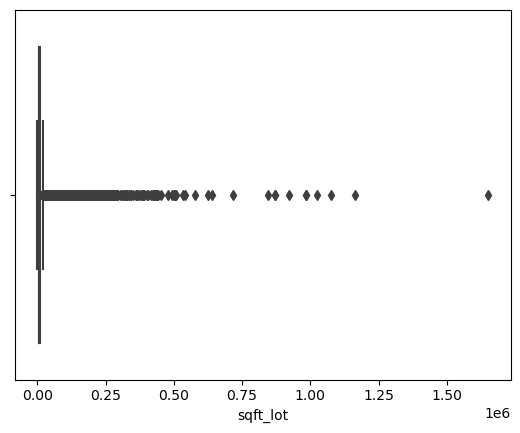

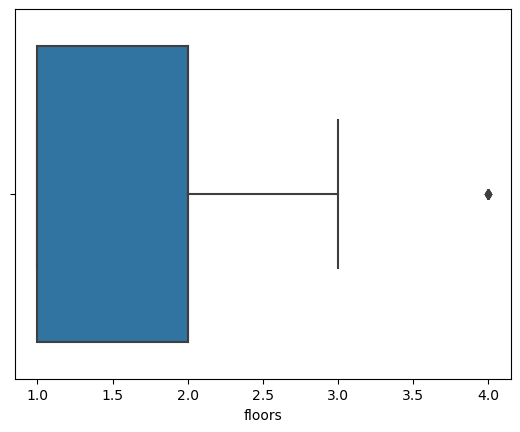

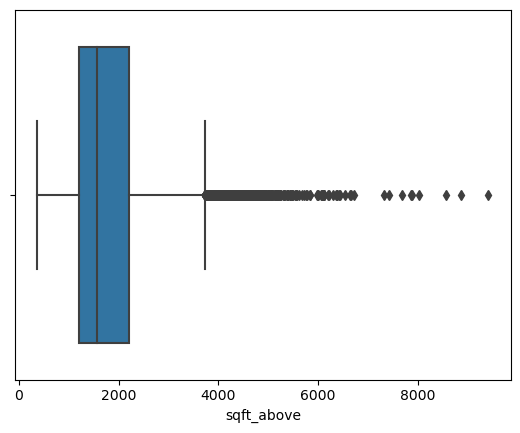

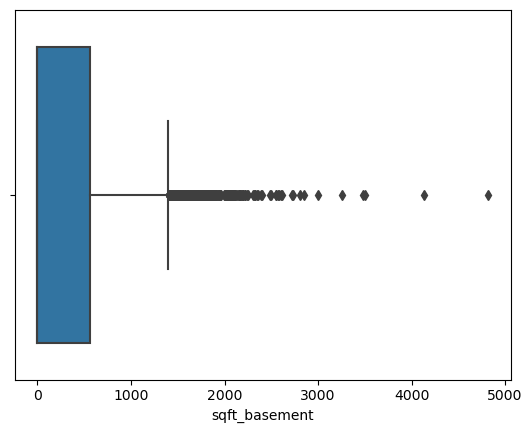

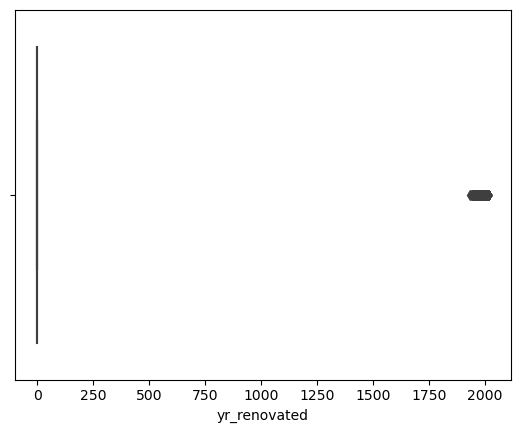

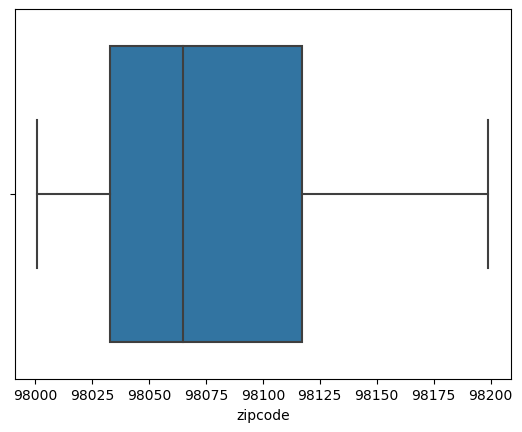

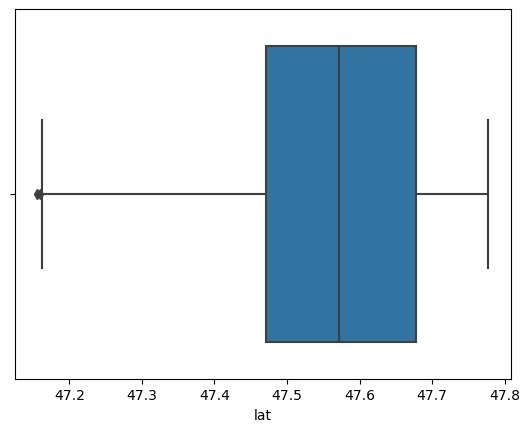

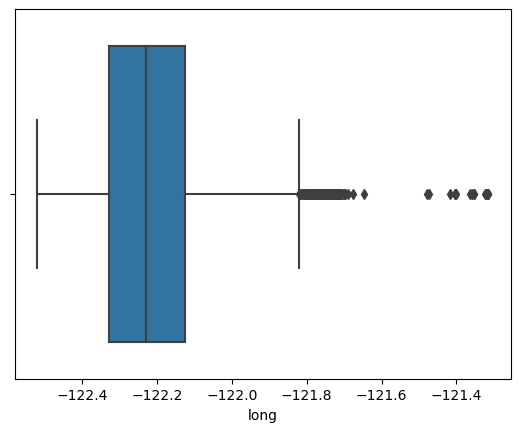

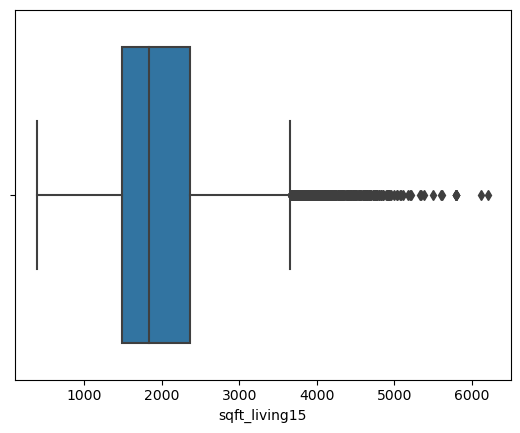

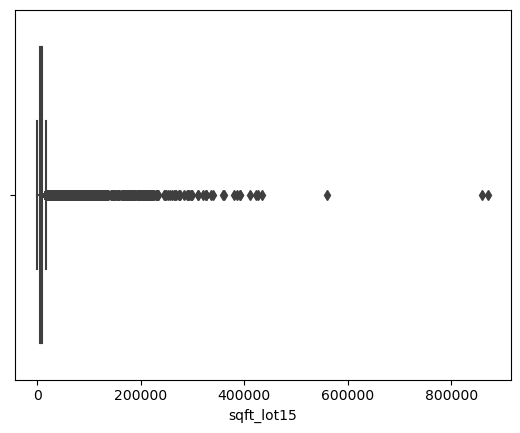

In [387]:
numeric_data = numeric_data.columns.tolist()
numeric_data.remove('id')
for col in numeric_data:
    sns.boxplot(x = df[col])
    plt.show()

There seems to be little to no changes in the boxplots which would mean that this dataset did not have outliers or if it did they were very few.

 We now need to join these numerical variables that outliers have been removed to the categorical variables that we already had to create whole new dataframe.

In [388]:
categorical = df.select_dtypes('object')
num = df[numeric_data] # creates a new dataframe of the numeric variables
df1 = num.join(categorical) # using .join joins the variables
df1 # Confirming dataset columns of new dataframe

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors   
0      221900.0         3          1         1180      5650       1  \
1      538000.0         3          2         2570      7242       2   
2      180000.0         2          1          770     10000       1   
3      604000.0         4          3         1960      5000       1   
4      510000.0         3          2         1680      8080       1   
...         ...       ...        ...          ...       ...     ...   
21592  360000.0         3          2         1530      1131       3   
21593  400000.0         4          2         2310      5813       2   
21594  402101.0         2          1         1020      1350       2   
21595  400000.0         3          2         1600      2388       2   
21596  325000.0         2          1         1020      1076       2   

       sqft_above  sqft_basement  yr_renovated  zipcode      lat     long   
0            1180              0           0.0    98178  47.5112 -122.257  \
1            2170            400        1991.0    98125  47.7210 -122.319   
2             770              0           0.0    98028  47.7379 -122.233   
3            1050            910           0.0    98136  47.5208 -122.393   
4            1680              0           0.0    98074  47.6168 -122.045   
...           ...            ...           ...      ...      ...      ...   
21592        1530              0           0.0    98103  47.6993 -122.346   
21593        2310              0           0.0    98146  47.5107 -122.362   
21594        1020              0           0.0    98144  47.5944 -122.299   
21595        1600              0           0.0    98027  47.5345 -122.069   
21596        1020              0           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15        date waterfront  view  condition   
0               1340        5650  10/13/2014         NO  NONE    Average  \
1               1690        7639   12/9/2014         NO  NONE    Average   
2               2720        8062   2/25/2015         NO  NONE    Average   
3               1360        5000   12/9/2014         NO  NONE  Very Good   
4               1800        7503   2/18/2015         NO  NONE    Average   
...              ...         ...         ...        ...   ...        ...   
21592           1530        1509   5/21/2014         NO  NONE    Average   
21593           1830        7200   2/23/2015         NO  NONE    Average   
21594           1020        2007   6/23/2014         NO  NONE    Average   
21595           1410        1287   1/16/2015         NO  NONE    Average   
21596           1020        1357  10/15/2014         NO  NONE    Average   

               grade yr_built  
0          7 Average     1955  
1          7 Average     1951  
2      6 Low Average     1933  
3          7 Average     1965  
4             8 Good     1987  
...              ...      ...  
21592         8 Good     2009  
21593         8 Good     2014  
21594      7 Average     2009  
21595         8 Good     2004  
21596      7 Average     2008  

[21143 rows x 20 columns]

#### 6. Exploratory Data Analysis

This will provide a better understanding of the dataset variables and the relationships between them using visualizations to identify and analyze trends in datasets.

#### i) Univariate Analysis

##### Numerical Data Distribution

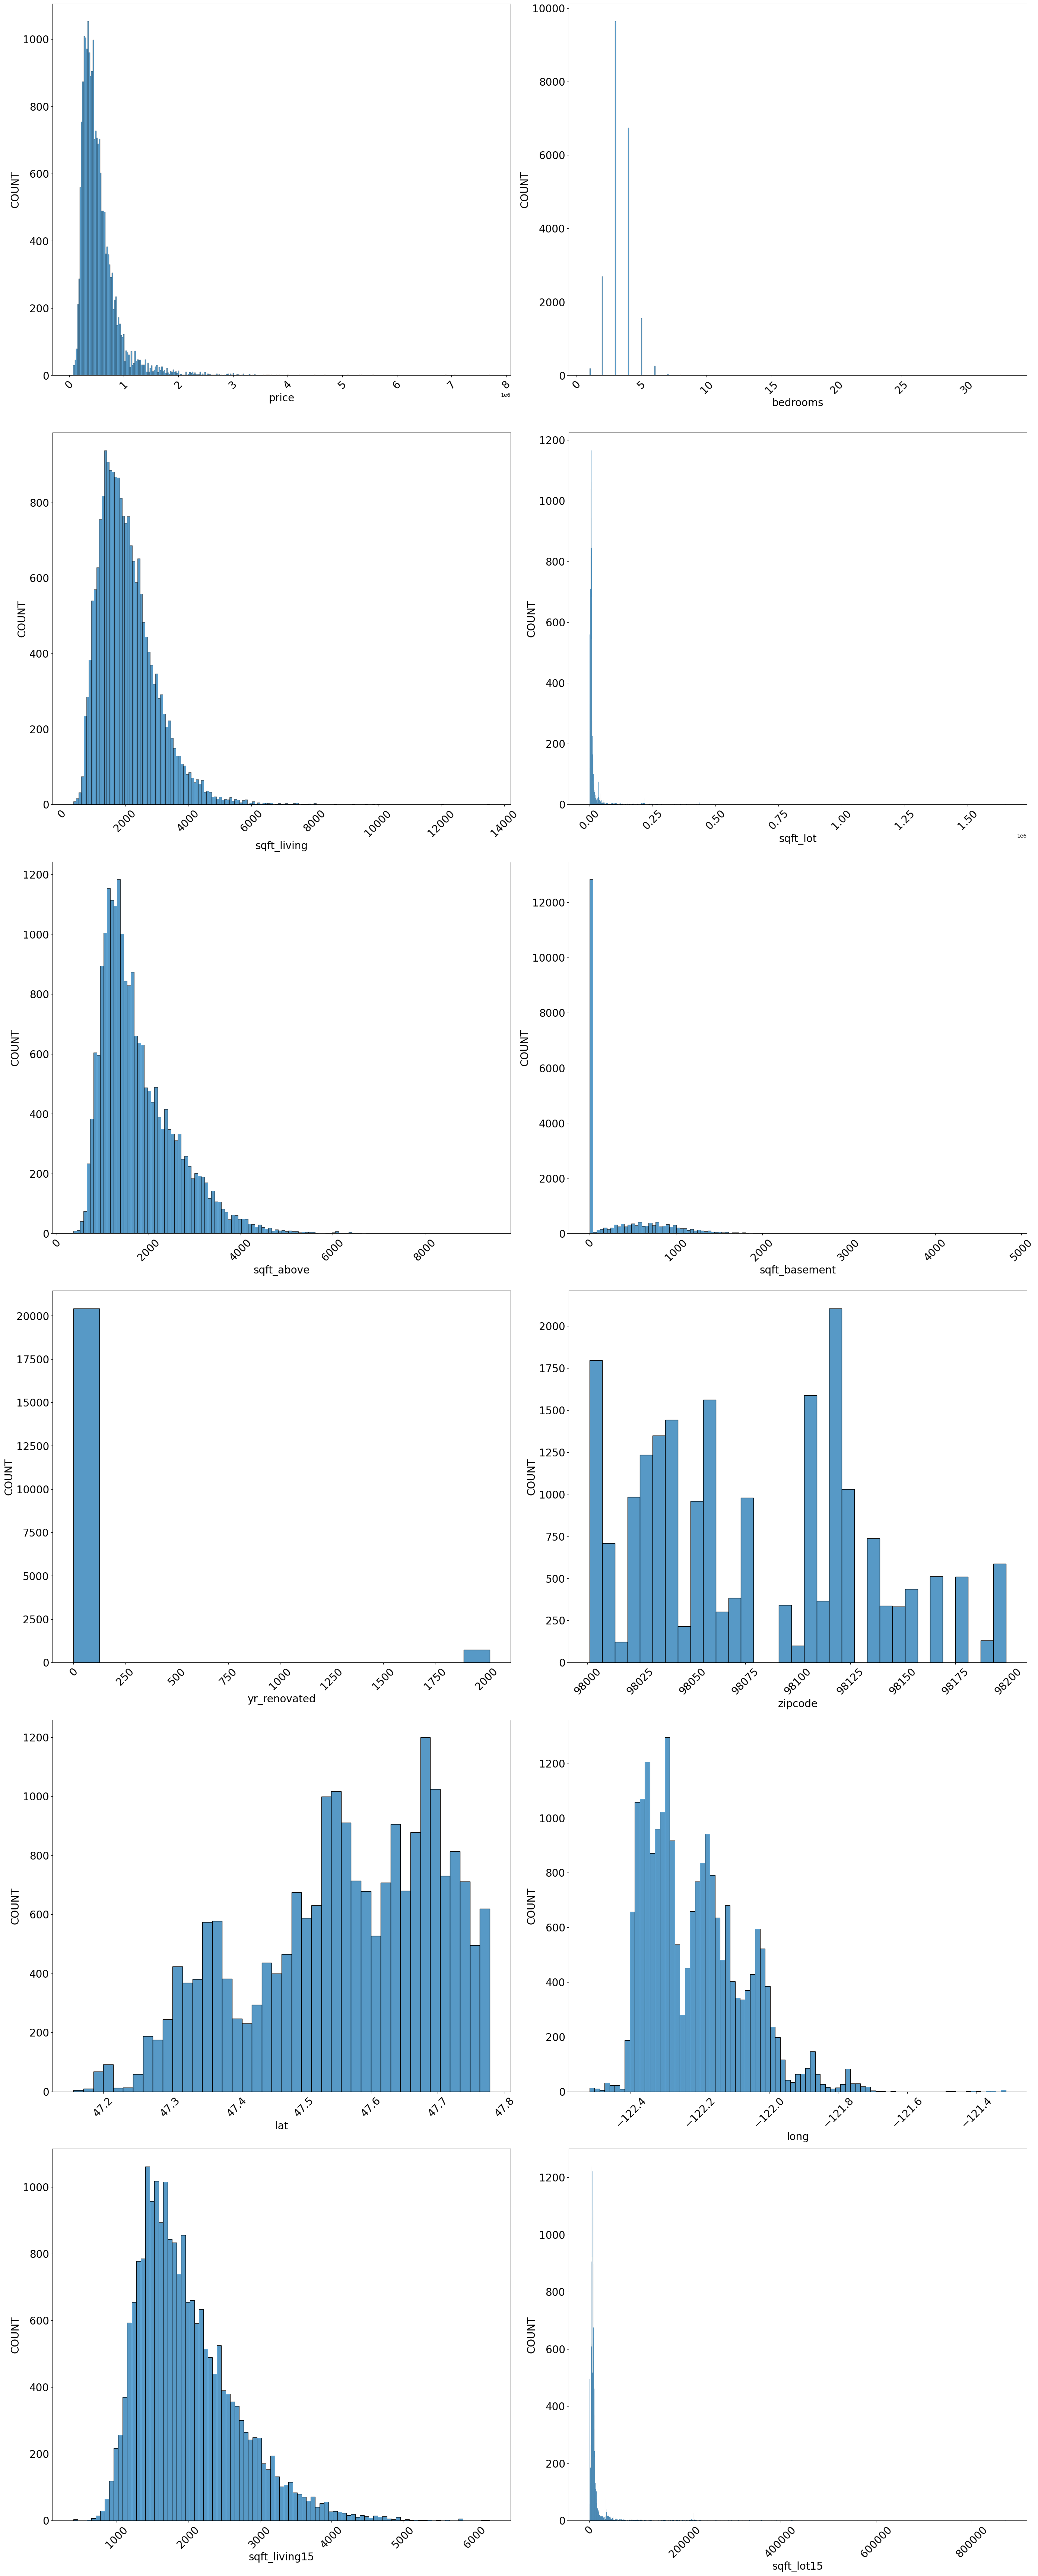

In [389]:
# Displays the distribution of the numerical variables in the dataset
fig = plt.figure(figsize=(28,160))
num_columns = df1.select_dtypes(['int64', 'float64']).columns.tolist() # converts dataframe to list
for index, col in enumerate(num_columns):
    ax= fig.add_subplot(14,2,index+1)
    sns.histplot(x=df[col], ax=ax)
    plt.ylabel('COUNT',size=20) # sets label for y-axis
    plt.xlabel(col,size=20) # set label for x-axis
    plt.xticks(size = 20, rotation = 45 )
    plt.yticks(size = 20)
    
plt.tight_layout()
plt.show() # displays distribution

#### Observations
'Price' is skewed to the left, this may pose as a threat when building the linear regression model as it will have negative
effect on predictions as 'Price' is the target variable. 
##### To treat this we could use log transformations. Below is 'price' before and after log transformation.

Text(0.5, 0.98, 'Not so Normal Distribution')

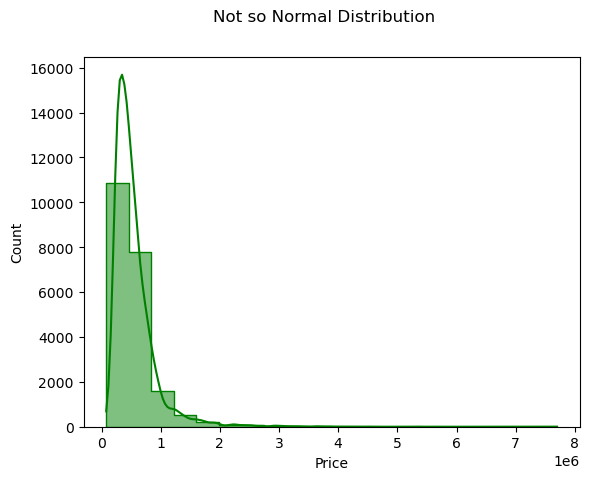

In [390]:
# Displays price before log transformation
fig, ax = plt.subplots()
sns.histplot(x=df1['price'], bins=20, element="step", kde=True, color="green", ax=ax)
ax.set_xlabel("Price")
fig.suptitle("Not so Normal Distribution")

Normalized Distribution

Log transformation is applied to treat the skewness. There are other ways to deal with normality issues but log transformations is the most helpful.

Text(0.5, 0.98, 'Normal Distribution')

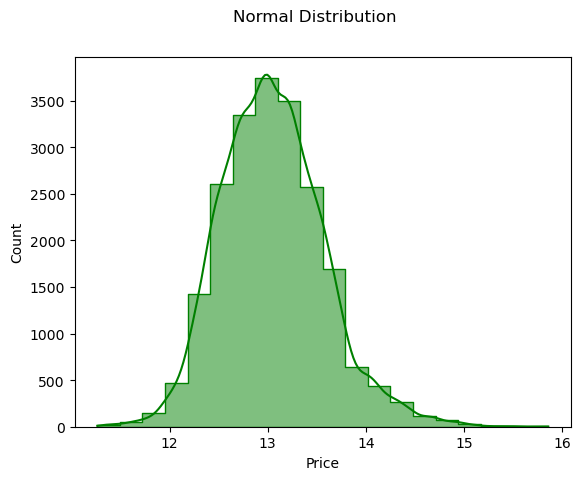

In [391]:
x = np.log(df.price) # method is used to find the log values of price.
# Displays price after log transformation
fig, ax = plt.subplots()
sns.histplot(x, bins=20, element="step", kde=True, color="green", ax=ax) # plots the log values of price feature
ax.set_xlabel("Price") # sets the xlabel of the diagram
fig.suptitle("Normal Distribution")

Amazing! Our target variable has a normal distribution hence the linear regression models and their predictors will not be affected.

Does not get better than this!(It does :) )

#### Categorical Data Distribution

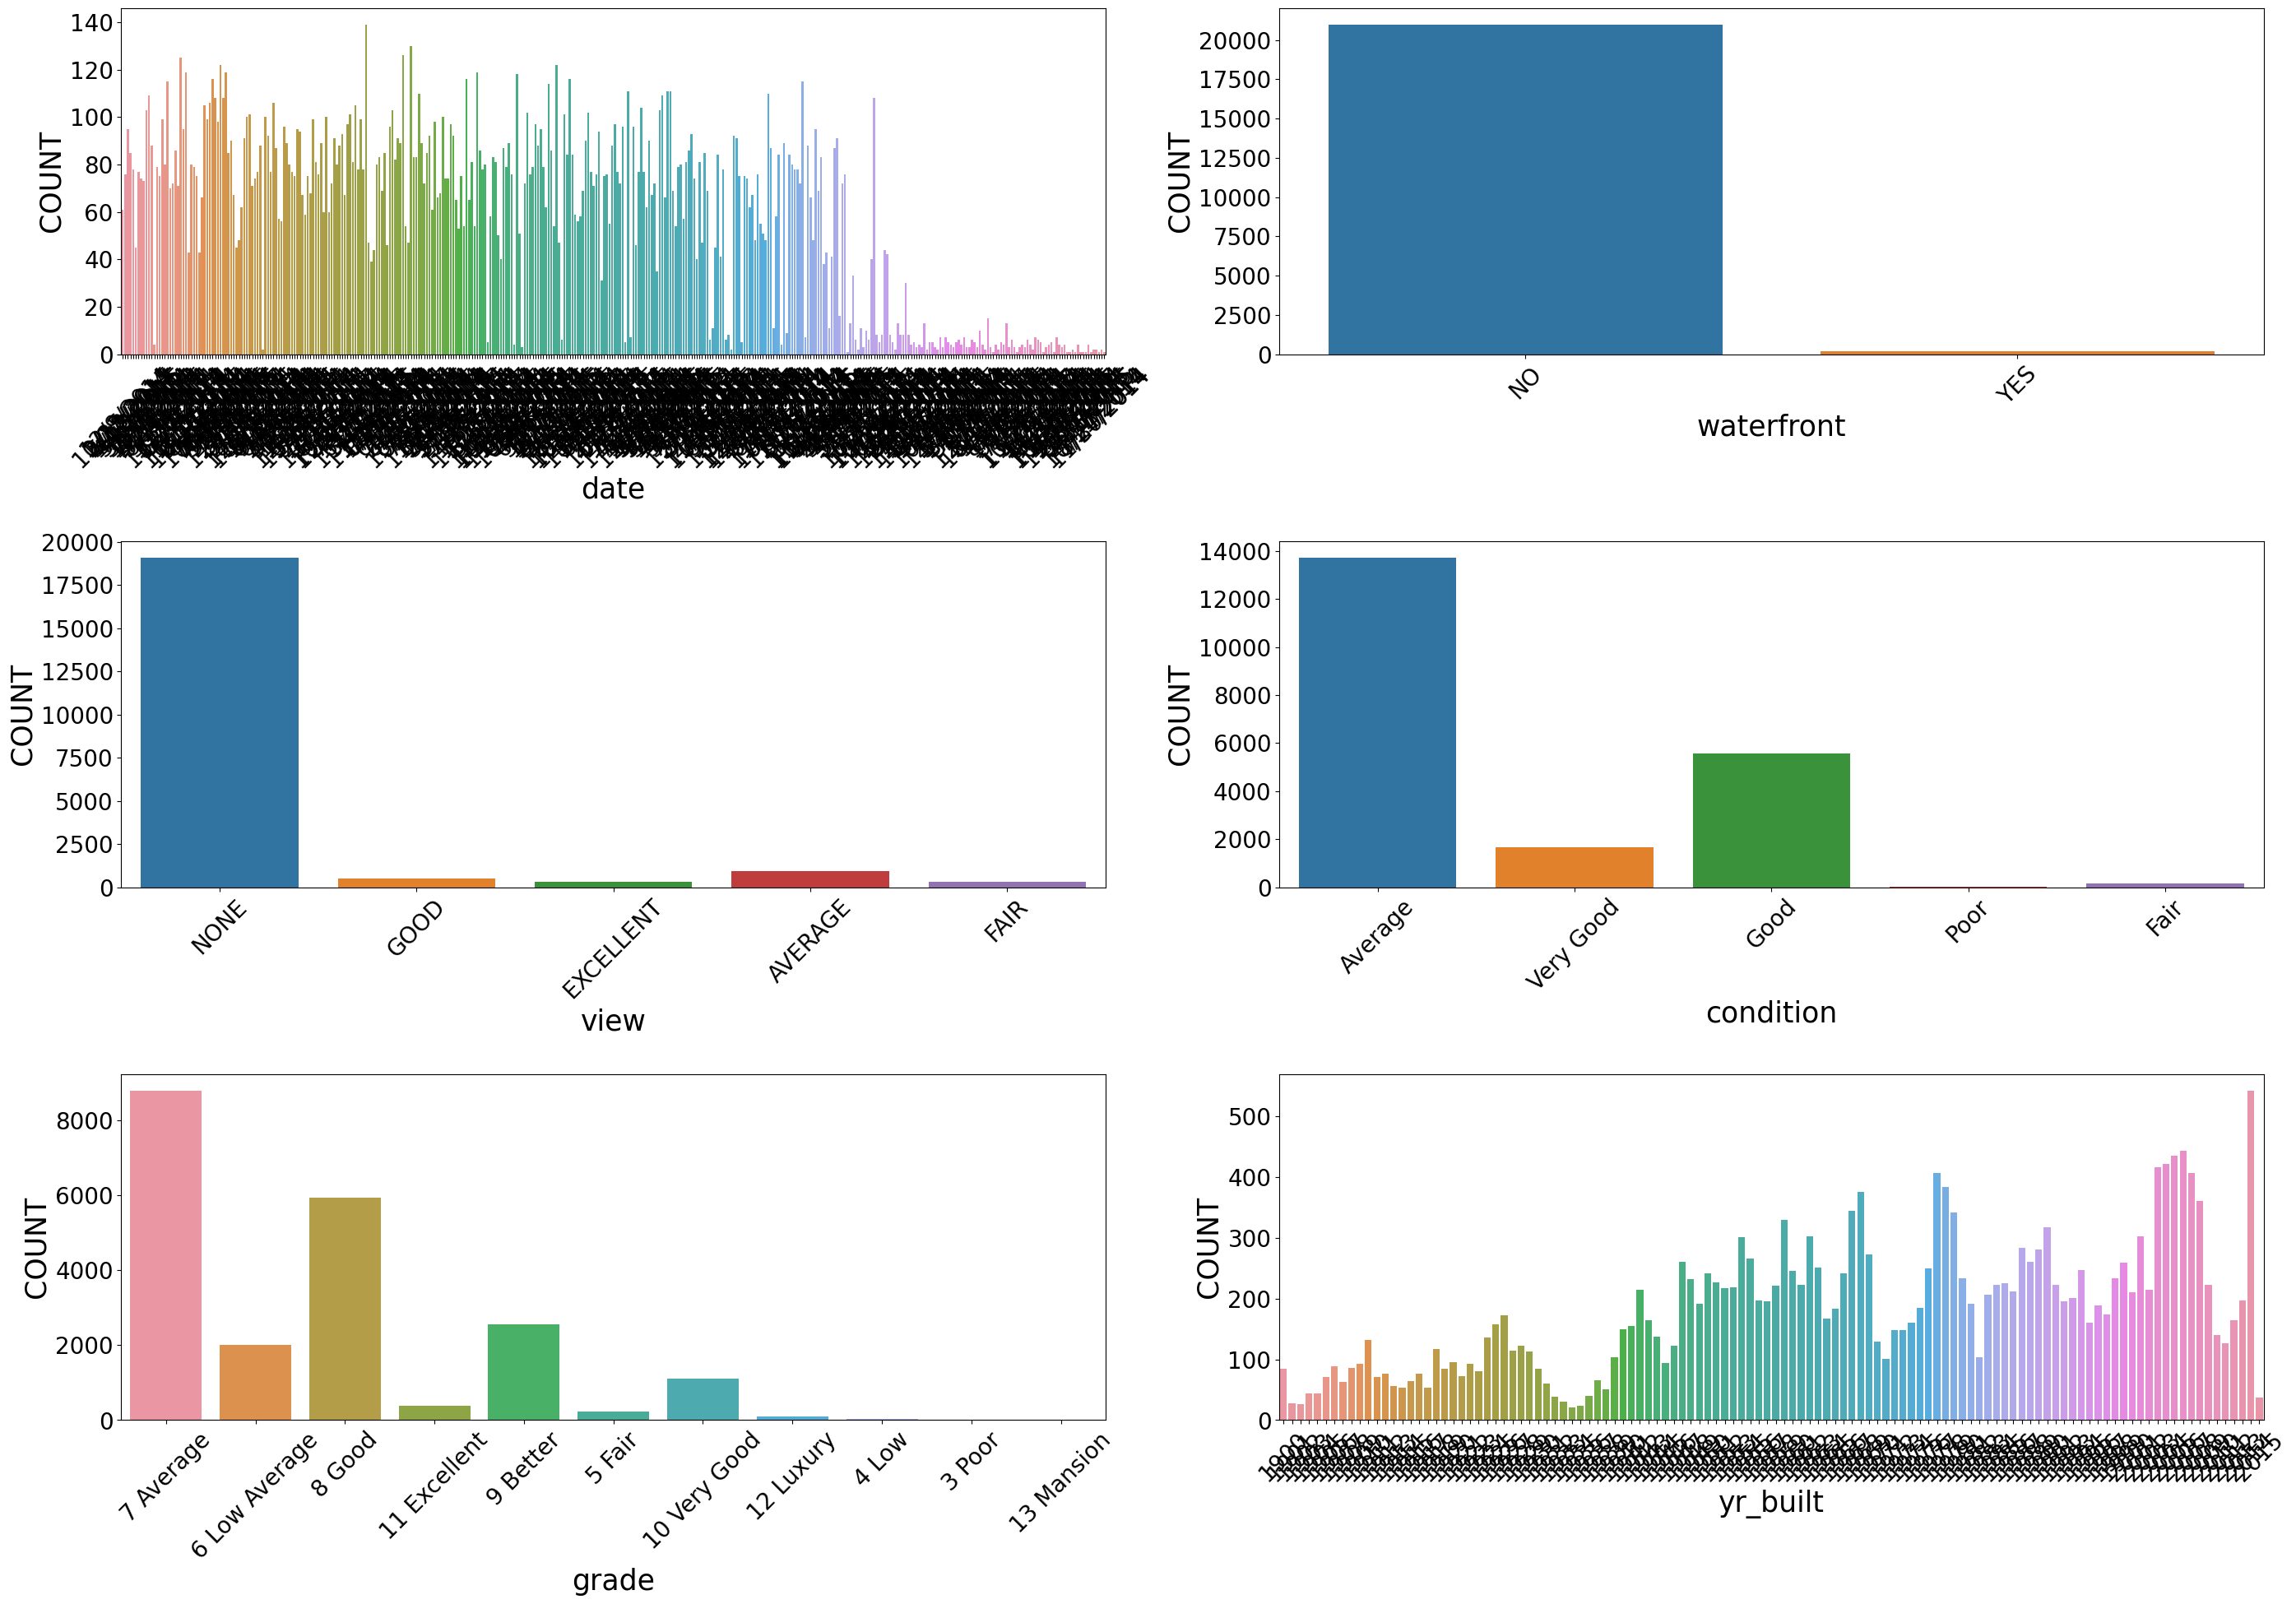

In [392]:
# Displays the distribution of the categorical variables.
fig = plt.figure(figsize=(28,160))
categorical_columns = df1.select_dtypes(include=['object']).columns.tolist()
for index, col in enumerate(categorical_columns):
    plt.subplot(25,2,index+1)
    sns.countplot(x=col, data=df)
    plt.ylabel('COUNT', size = 25)
    plt.xlabel(col, fontsize = 25)
    plt.xticks(size = 20, rotation = 45)
    plt.yticks(size = 20)
fig.tight_layout(pad=1.0)

Categorical Data visualization is as shown above.

The majority of the categorical variables seem to have ordinal categorical data. For data to be considered ordinal categorical it means that it is qualitative data that has been grouped. This will be very useful information for later.

#### ii) Bivariate analysis

We have used a scatter plot to display the relationship of numerical variables to the price variable in the data.

Now that the price feature has been normalized we want to see the relationship between price and other variables in the data.

Scatter Plot.

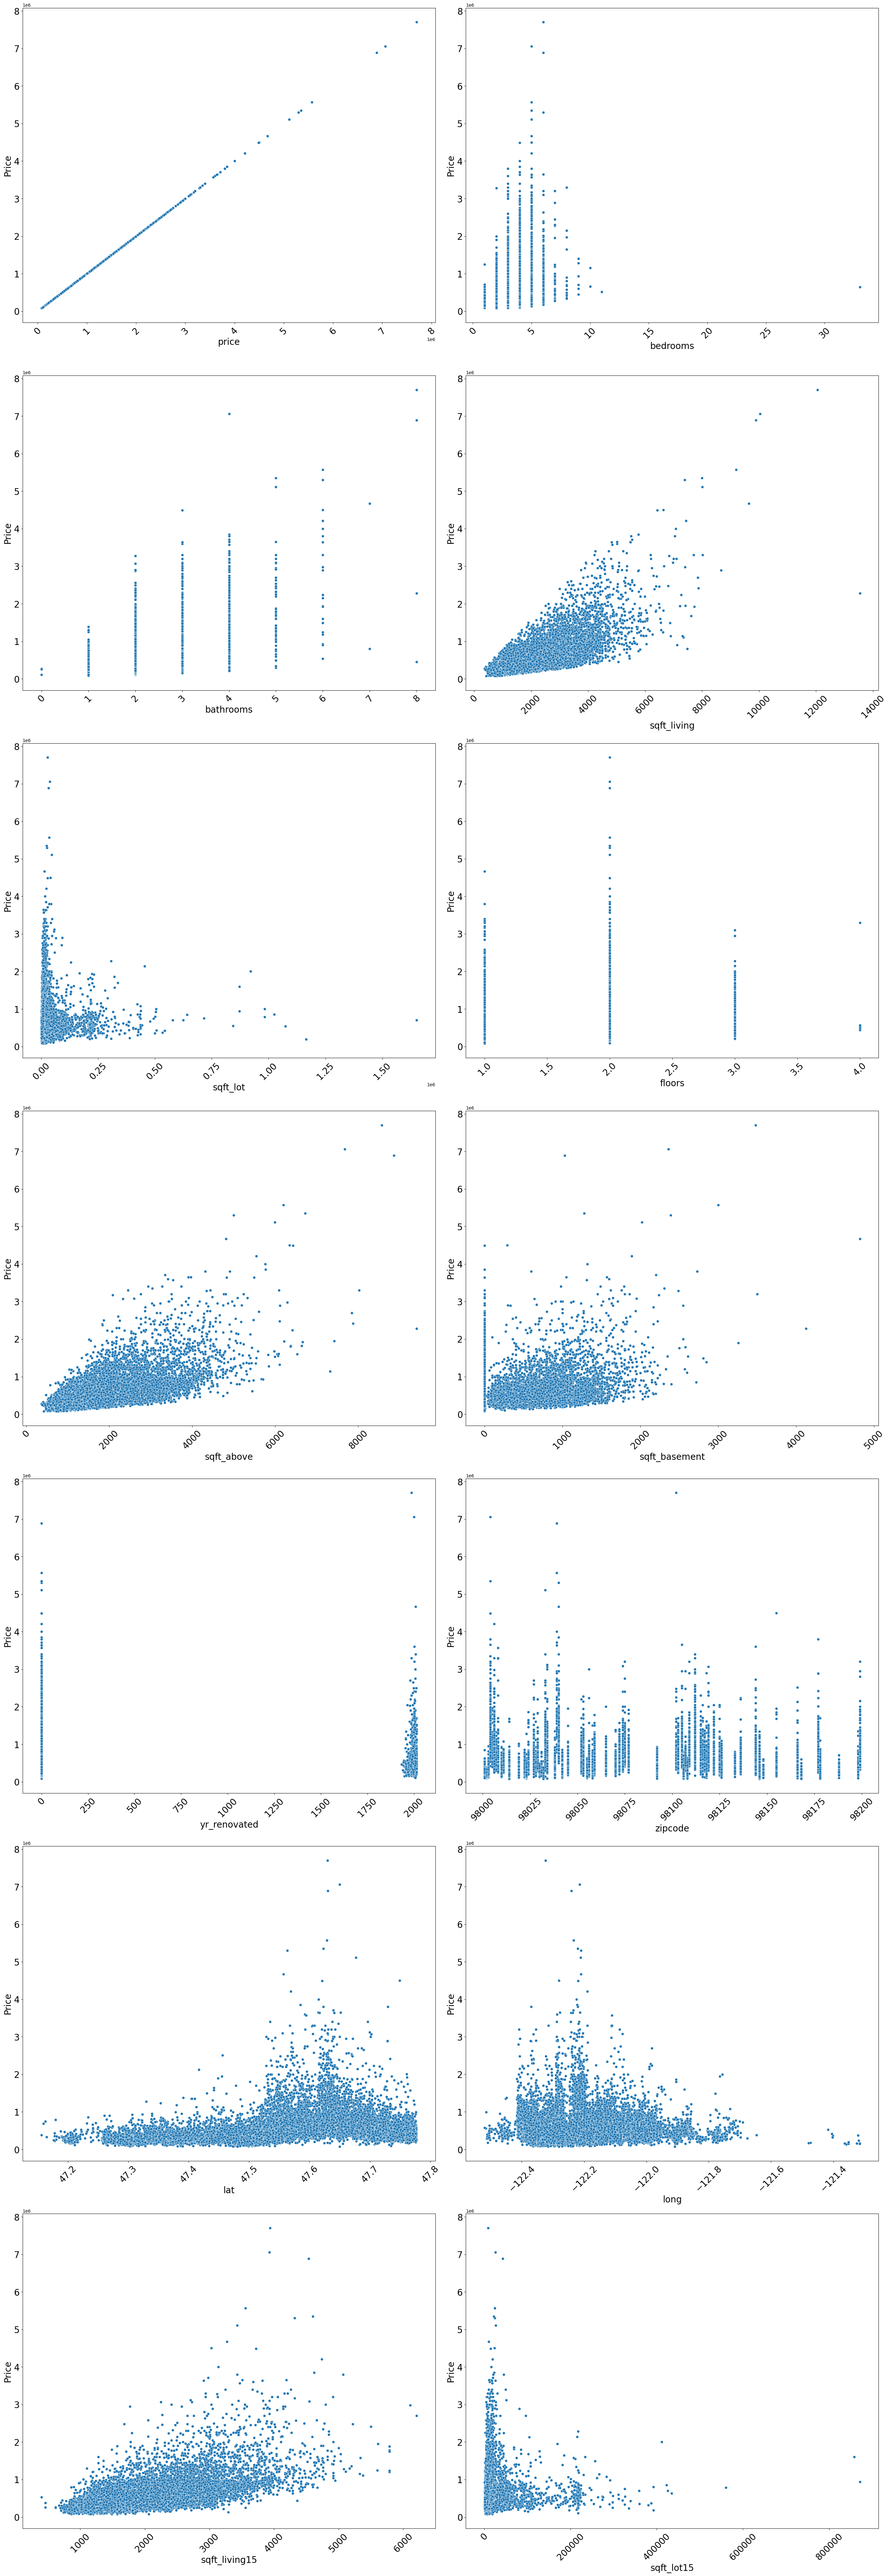

In [393]:
# Visualizes a scatter plot of the numerical variables against price variable after normalization of the price variable.
fig = plt.figure(figsize=(28,160))
num_columns = df1.select_dtypes(exclude='object').columns.tolist()
for index, col in enumerate(num_columns):
    ax= fig.add_subplot(14,2,index+1)
    sns.scatterplot(x=df1[col], y=df1['price'],ax=ax)
    plt.ylabel('Price',size=20) # sets label for y-axis
    plt.xlabel(col,size=20) # set label for x-axis
    plt.xticks(size = 20, rotation = 45 )
    plt.yticks(size = 20)
    
plt.tight_layout()
plt.show()

 Each variable has a relationship with price which we will use in forming the models.

Most of the variables do not to have a very clear linear relationship with price.

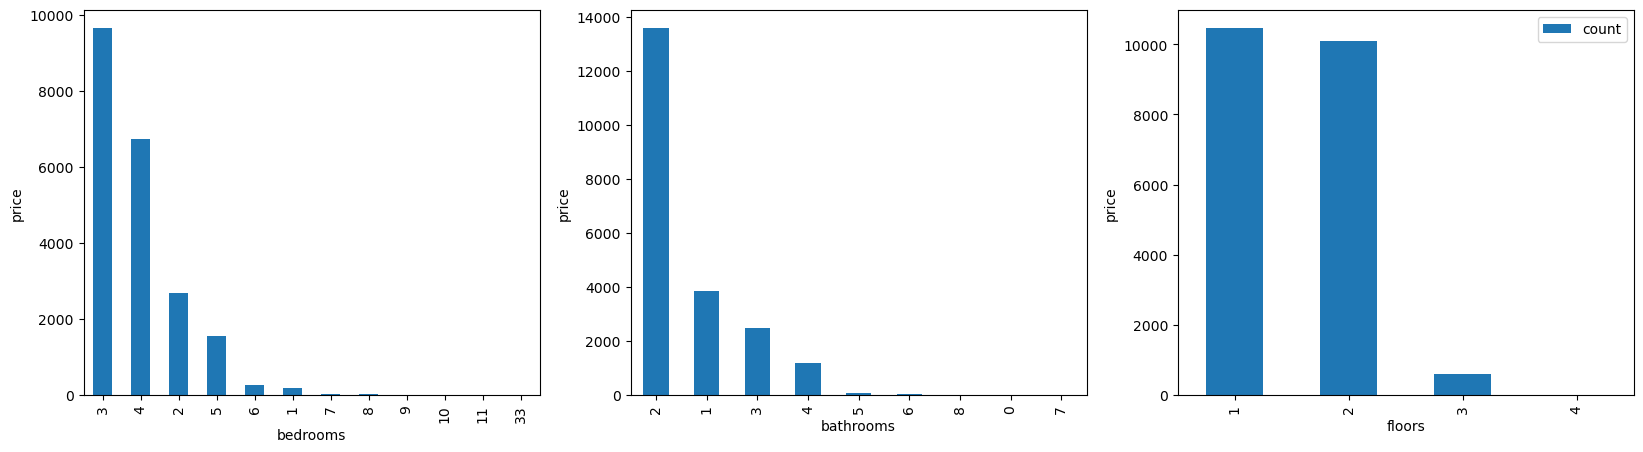

In [394]:
bedrooms = df1['bedrooms'].value_counts()
bathrooms = df1['bathrooms'].value_counts()
floors = df1['floors'].value_counts()
fig,(ax1,ax2,ax3) = plt.subplots(figsize=(20,5),ncols=3)
bedrooms.plot.bar(y="price",ax=ax1,ylabel='price')
bathrooms.plot.bar(y="price",ax=ax2,ylabel='price')
floors.plot.bar(y="price",ax=ax3,ylabel='price')
plt.legend()
plt.show()

We have plotted these numerical variables using barplots to clearly see the relationship between price and the variables and it is clear that these 

variables affect price.

#### 7. MODELLING

The next step is modelling these variables. 

We create a correlation matrix.

In [395]:
df1[num_columns].corr() #  Displays correlation between variables.

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors   
price          1.000000  0.309204   0.519032     0.702328  0.087937  0.244631  \
bedrooms       0.309204  1.000000   0.487532     0.577998  0.032262  0.180767   
bathrooms      0.519032  0.487532   1.000000     0.701847  0.090399  0.328811   
sqft_living    0.702328  0.577998   0.701847     1.000000  0.172941  0.322818   
sqft_lot       0.087937  0.032262   0.090399     0.172941  1.000000 -0.003717   
floors         0.244631  0.180767   0.328811     0.322818 -0.003717  1.000000   
sqft_above     0.605143  0.479210   0.600056     0.876678  0.183461  0.489050   
sqft_basement  0.325008  0.302683   0.333533     0.434576  0.015533 -0.245446   
yr_renovated   0.116719  0.018452   0.062248     0.049964  0.004182  0.011722   
zipcode       -0.053166 -0.152628  -0.144712    -0.198906 -0.129355 -0.022668   
lat            0.306507 -0.009521   0.049361     0.052986 -0.085457  0.063645   
long           0.022101  0.131093   0.150980     0.240797  0.230583  0.089902   
sqft_living15  0.586415  0.392476   0.498284     0.756389  0.143428  0.243620   
sqft_lot15     0.083192  0.030479   0.088538     0.184466  0.720649 -0.010761   

               sqft_above  sqft_basement  yr_renovated   zipcode       lat   
price            0.605143       0.325008      0.116719 -0.053166  0.306507  \
bedrooms         0.479210       0.302683      0.018452 -0.152628 -0.009521   
bathrooms        0.600056       0.333533      0.062248 -0.144712  0.049361   
sqft_living      0.876678       0.434576      0.049964 -0.198906  0.052986   
sqft_lot         0.183461       0.015533      0.004182 -0.129355 -0.085457   
floors           0.489050      -0.245446      0.011722 -0.022668  0.063645   
sqft_above       1.000000      -0.052293      0.019535 -0.260814 -0.000346   
sqft_basement   -0.052293       1.000000      0.067145  0.075381  0.110637   
yr_renovated     0.019535       0.067145      1.000000  0.061752  0.029435   
zipcode         -0.260814       0.075381      0.061752  1.000000  0.267070   
lat             -0.000346       0.110637      0.029435  0.267070  1.000000   
long             0.344543      -0.145174     -0.064200 -0.564092 -0.135183   
sqft_living15    0.731016       0.201579      0.001286 -0.278006  0.050441   
sqft_lot15       0.195638       0.016660      0.002708 -0.146709 -0.084984   

                   long  sqft_living15  sqft_lot15  
price          0.022101       0.586415    0.083192  
bedrooms       0.131093       0.392476    0.030479  
bathrooms      0.150980       0.498284    0.088538  
sqft_living    0.240797       0.756389    0.184466  
sqft_lot       0.230583       0.143428    0.720649  
floors         0.089902       0.243620   -0.010761  
sqft_above     0.344543       0.731016    0.195638  
sqft_basement -0.145174       0.201579    0.016660  
yr_renovated  -0.064200       0.001286    0.002708  
zipcode       -0.564092      -0.278006   -0.146709  
lat           -0.135183       0.050441   -0.084984  
long           1.000000       0.334270    0.255557  
sqft_living15  0.334270       1.000000    0.183089  
sqft_lot15     0.255557       0.183089    1.000000

We use this correlation matrix to find the correlation between variables in the data.

Correlation matrices display the correlation between variables, correlation of 0.8 or higher are variables considered highly correlated.

In [396]:
abs(df1[num_columns].corr())> 0.75 # the pair-wise correlations with the highest absolute correlation.

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors   
price           True     False      False        False     False   False  \
bedrooms       False      True      False        False     False   False   
bathrooms      False     False       True        False     False   False   
sqft_living    False     False      False         True     False   False   
sqft_lot       False     False      False        False      True   False   
floors         False     False      False        False     False    True   
sqft_above     False     False      False         True     False   False   
sqft_basement  False     False      False        False     False   False   
yr_renovated   False     False      False        False     False   False   
zipcode        False     False      False        False     False   False   
lat            False     False      False        False     False   False   
long           False     False      False        False     False   False   
sqft_living15  False     False      False         True     False   False   
sqft_lot15     False     False      False        False     False   False   

               sqft_above  sqft_basement  yr_renovated  zipcode    lat   long   
price               False          False         False    False  False  False  \
bedrooms            False          False         False    False  False  False   
bathrooms           False          False         False    False  False  False   
sqft_living          True          False         False    False  False  False   
sqft_lot            False          False         False    False  False  False   
floors              False          False         False    False  False  False   
sqft_above           True          False         False    False  False  False   
sqft_basement       False           True         False    False  False  False   
yr_renovated        False          False          True    False  False  False   
zipcode             False          False         False     True  False  False   
lat                 False          False         False    False   True  False   
long                False          False         False    False  False   True   
sqft_living15       False          False         False    False  False  False   
sqft_lot15          False          False         False    False  False  False   

               sqft_living15  sqft_lot15  
price                  False       False  
bedrooms               False       False  
bathrooms              False       False  
sqft_living             True       False  
sqft_lot               False       False  
floors                 False       False  
sqft_above             False       False  
sqft_basement          False       False  
yr_renovated           False       False  
zipcode                False       False  
lat                    False       False  
long                   False       False  
sqft_living15           True       False  
sqft_lot15             False        True

In this case we can clearly see that these features are not highly correlated to each other hence we will not have a problem of perfect multicollinearity, meaning these features are independent.

We use heat maps to display collinearity in variables

<Axes: >

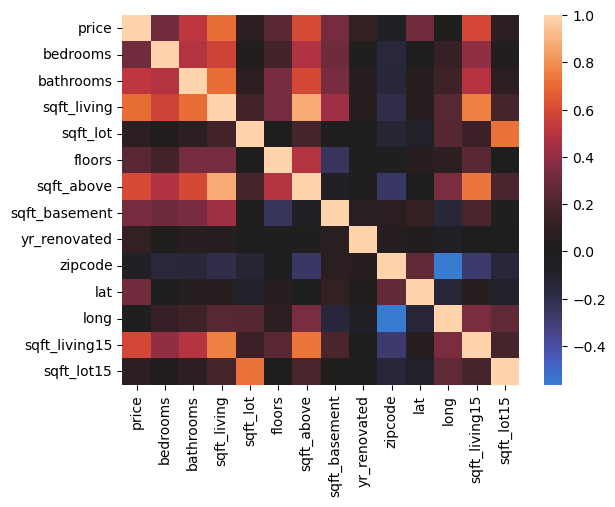

In [397]:
sns.heatmap(df1[num_columns].corr(), center=0) 

The variables are clearly not highly correlated to each other as we can see in the heatmap.

### Simple Linear Regression Model

We can now focus on fitting a linear relationship between any two variables in the dataset one being price(target variable)

In [398]:
corr = df1.select_dtypes('number').corr()['price'] 
corr# Finds the correlation of the predictor variables with target variable 'price'.

price            1.000000
bedrooms         0.309204
bathrooms        0.519032
sqft_living      0.702328
sqft_lot         0.087937
floors           0.244631
sqft_above       0.605143
sqft_basement    0.325008
yr_renovated     0.116719
zipcode         -0.053166
lat              0.306507
long             0.022101
sqft_living15    0.586415
sqft_lot15       0.083192
Name: price, dtype: float64

'sqft_living' has the strongest correlation with 'price' hence it qualifies as the predictor variable that we will use to build this linear regression model.

### Plotting the predictor vs Price

We create a scatter plot for the variable 'sqft_living' and 'price'

<Axes: xlabel='sqft_living', ylabel='price'>

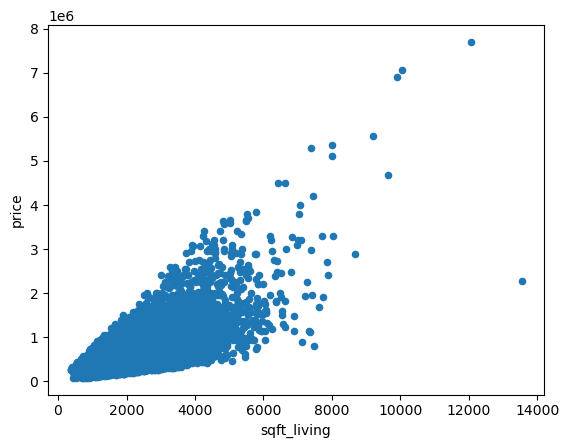

In [399]:
df1.plot.scatter(x='sqft_living',y='price')

The variables have a somewhat linear relationship.

### Setting Up Variables for Regression

Declare 'y' and 'X_baseline' variables, where 'y' is a Series containing 'price' data and 'X_baseline' is a DataFrame containing the column with the strongest correlation.

In [400]:
y = df1['price']
X_baseline = df1[['sqft_living']]

Next is creating and fitting a simple linear regression

In [401]:
baseline_model = sm.OLS(y, exog=sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

#### Regression results 

In [402]:
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.058e+04
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:11:03   Log-Likelihood:            -2.9378e+05
No. Observations:               21143   AIC:                         5.876e+05
Df Residuals:                   21141   BIC:                         5.876e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.513e+04   4462.443    -10.113      0.000   -5.39e+04   -3.64e+04
sqft_living   281.4327      1.962    143.454      0.000     277.587     285.278
==============================================================================
Omnibus:                    14518.924   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           535834.159
Skew:                           2.825   Prob(JB):                         0.00
Kurtosis:                      27.006   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Regression Results Interpretation

 y = 281.43x - 4.513e+04

 pvalue = 0.00, alpha value = 0.05
 
i) R-squared of 0.493 means that 49% of the variation in dependent variable price can be explained by independent variable sqft_living in the model.

ii) The model is statistically significant overall with a F-statistic p-value of well below 0.05

iii) The coefficient 'sqft_living' has an effect on 'price' in that an increase of 1 square foot of the living space in the home will indicate an increase in house price by 281.43

iv) The model is statistically signicant as the coefficients 'const' and 'sqft_living' pvalue is well below alpha value-0.05.

#### Multiple Linear Regression Model

#### Bar Plot

This display below is very important in that it displays the relationship between price and the categorical features in the data.

Now that we want to build a muliptle linear regression model we are open to the addition of predictors in the model. Some of our potential predictors(features) are categorical and it seems they are ordinal categorical data as shown below. To be ordinal categorical data it mean that it is qualitative data that has been grouped.

In building a linear regression model, we need all the features to be numeric and as for the categorical features we will need to convert to numeric. The data from these features is ordinal categorical data and so we will use Label Encoding to convert the features to numeric. Label encoding keepds the order of ordinal categorical data.

So Let's get to it!

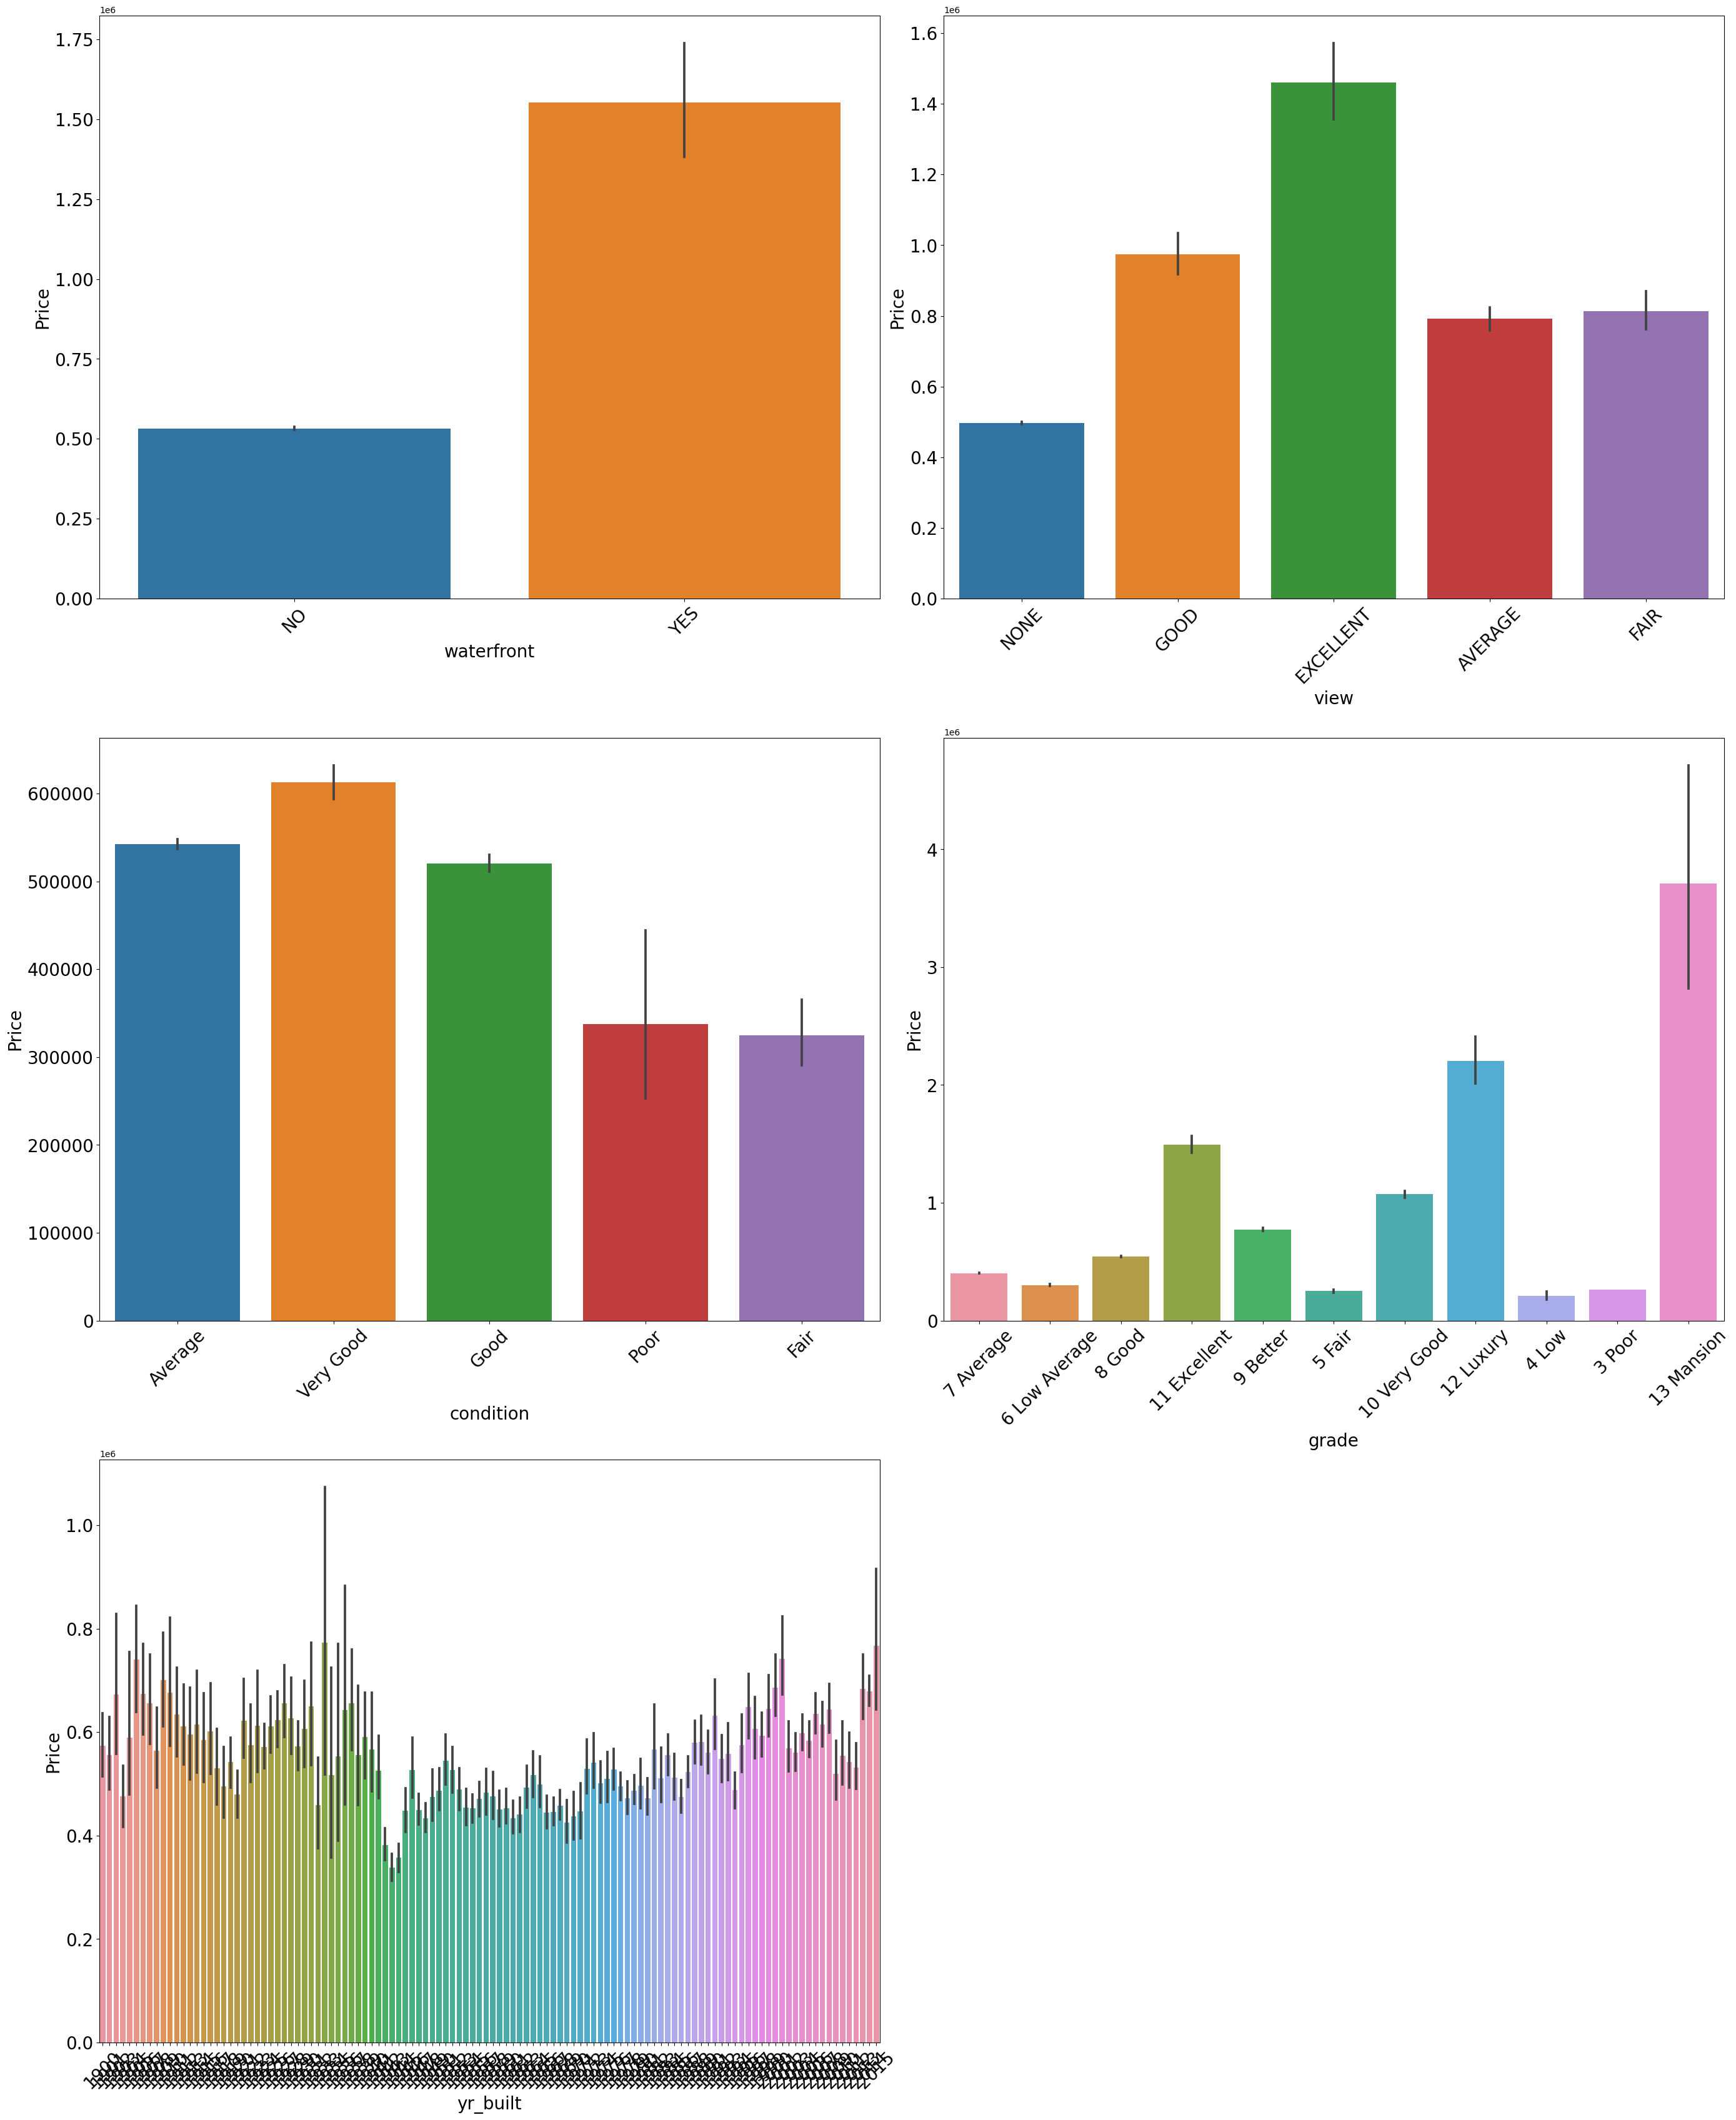

In [403]:
# Visualizes relationship
fig = plt.figure(figsize=(28,160))
category_columns = df1.select_dtypes(include='object').columns.tolist()
category_columns.remove('date')
for index, col in enumerate(category_columns):
    ax= fig.add_subplot(14,2,index+1)
    sns.barplot(x=df1[col], y=df1['price'],ax=ax)
    plt.ylabel('Price',size=20)
    plt.xlabel(col,size=20)
    plt.xticks(size = 20, rotation = 45 )
    plt.yticks(size = 20)
    
plt.tight_layout()
plt.show()

We use a bar plot to visualize the categorical variables and their relationship to price.

Label Encoding

In [404]:
# Before transformation
df1.select_dtypes('object')
df[categorical_columns]

date waterfront  view  condition          grade yr_built
0      10/13/2014         NO  NONE    Average      7 Average     1955
1       12/9/2014         NO  NONE    Average      7 Average     1951
2       2/25/2015         NO  NONE    Average  6 Low Average     1933
3       12/9/2014         NO  NONE  Very Good      7 Average     1965
4       2/18/2015         NO  NONE    Average         8 Good     1987
...           ...        ...   ...        ...            ...      ...
21592   5/21/2014         NO  NONE    Average         8 Good     2009
21593   2/23/2015         NO  NONE    Average         8 Good     2014
21594   6/23/2014         NO  NONE    Average      7 Average     2009
21595   1/16/2015         NO  NONE    Average         8 Good     2004
21596  10/15/2014         NO  NONE    Average      7 Average     2008

[21143 rows x 6 columns]

In [411]:
# Transforms the categorical variables to numeric
le = LabelEncoder()
#categorical_columns.remove('date') # removes date from categorical variables
for col in df1[categorical_columns]:
    if df1[col].dtype == 'object':
        df1[col] = le.fit_transform(df1[col])

# After transformation
df1['view'].value_counts()

view
4    19076
0      931
3      497
2      328
1      311
Name: count, dtype: int64

In [406]:
# Setting up variables for linear regression model
X_second = df1.drop(['date','yr_built','price','zipcode','lat','long'], axis=1)
y = df1['price']

# Creating and fitting a linear regression model
second_model = sm.OLS(y, exog=sm.add_constant(X_second))
second_model_results = second_model.fit()

# summary of model results
print(second_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     2347.
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:11:11   Log-Likelihood:            -2.9152e+05
No. Observations:               21143   AIC:                         5.831e+05
Df Residuals:                   21129   BIC:                         5.832e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.705e+05   1.31e+04     20.622

#### Regression results Interpretation

So now we have a maulitple linear regression model.

The model has a R-squared of 0.591, this means that the model explains 59.1% of variation in price variable. This is much better
than the first model.

The model is overall statistically significant with f-statistic pvalue well below 0.05.

The Intercept('const') 2.705e+05 is the price of a house when all the cofficients are at zero.(Not really a meaningful 
value as it is impossible)

We see the Intercept('const') has turned from a negative number to a positive number.

The coefficient 'sqft_lot' is not statistically significant as its pvalue is well above 0.05.

The remaining coefficients are statistically significant with pvalues well below 0.05.

Based on the summary model it can summarized as follows:
y= c + beta1x1 + beta2x2 ...... beta19x19

where; c is the Intercept
beta1 - coefficient of the variable
beta2 - coefficient of the variable etc. upto beta19


#### We will use Adjusted R-squared to evaluate this model

In [407]:
second_model_results.rsquared_adj

0.5905637846228864

Adjusted R-squared accounts for additional predictors.

This adjusted R-squared informs us that 59.1% of the model explains the variation in price. This is good but not great. When the coefficient is closer to 1 than 0, it is considered a good model.

#### 8. Conclusions
1. The mulitple linear regression model had a higher R-squared than the simple linear regression model indicating that factors 
affecting house prices can be explained by more than one feature of a house.

2. The coefficient 'sqft_living' seems to have the highest positive effect on house prices in both the simple linear regression model
 and multiple linear regression model. 'sqft_living' represents square footage of living space in the home.

3. This dataset provides quite insightful data that is very helpful to realtors, homebuyers ,homesellers.

4. For model evaluation, I have used R-squared to evaluate the linear regression model and Adjusted R-squared to evaluate multiple linear regression model.

#### 9. Recommendations
1. As according to my findings, homeowners should focus on number of bathrooms, squarefoot living space in the home, Square footage of house apart from basement, Square footage of the basement and number of floors when they want to do home renovations as these factors affect price of house positively.

2. Considering other algorithms beyond multiple regression.

3. Housing agency should be aware that timing affect the price and should therefore advice homeowners on when to build and sell.